# Social Media Sentiment Analysis on Starbucks

> **Description:** The aim of this project is to collect data and analyse what people say about Starbucks on Twitter and Reddit. It finds and studies posts and tweets about Starbucks to see what people think and feel.

> **Methodologies Used**
1. **Data Collection:** Utilized Tweepy to fetch tweets and PRAW to gather
Reddit posts, focusing on Starbucks-related keywords.
2. **Data Cleaning and Preprocessing:** Used regular expressions, NLTK for natural language processing, and other Python libraries to clean and preprocess the text data, removing unnecessary elements like emojis and URLs.
3. **Sentiment Analysis:** Used TextBlob to perform sentiment analysis on the cleaned data, classifying sentiments as positive, negative, or neutral.
4. **Exploratory Data Analysis (EDA):** Conducts statistical analysis and visualizations like word clouds and histograms to explore the data characteristics.
5. **Topic Modeling:** Applied LDA (Latent Dirichlet Allocation) for topic modeling to uncover underlying themes in the social media content.
6. **Final Data Representation**: The cleaned, processed, and analyzed data is saved into CSV files for further use and visualization purposes, providing insights into the public sentiment regarding Starbucks on social media platforms.

In [ ]:
!pip install tweepy

In [ ]:
import tweepy
import pandas as pd

In [ ]:
# Set up Twitter API credentials
api_key = ' api key '
api_key_secret = 'api_key_secret'
bearer_token = 'bearer_token'
access_token = '1access_token'
access_token_secret = 'access_token_secret'

In [ ]:
# Authenticate and set up API
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
# Defining search parameters
query = 'StarbucksCoffee OR latte OR frappuccino OR icedcoffee OR pumpkinspice OR cappuccino'  # search query with multiple keywords
num_tweets = 1000  # maximum number of tweets to collect
latitude = 51.5074  # latitude of the location to search (for United Kingdom)
longitude = -0.1278  # longitude of the location to search (for United Kingdom)
radius = '300km'  # radius to search (in kilometers)

In [ ]:
# Collecting tweets from the United Kingdom
tweets = tweepy.Cursor(api.search_tweets,
                       q=query, geocode=f"{latitude},"
                                        f"{longitude},"
                                        f"{radius}",
                       tweet_mode='extended').items(num_tweets)

In [ ]:
# Creating empty lists to store tweet data
tweet_ids = []
created_at = []
locations = []
tweet_texts = []

In [ ]:
# Looping through tweet objects
for tweet in tweets:
    Extract tweet data
    tweet_id = tweet.id  # Get tweet ID
    tweet_time = tweet.created_at
    location = tweet.user.location
    tweet_text = tweet.full_text

    # Appending tweet data to lists
    tweet_ids.append(tweet_id)
    created_at.append(tweet_time)
    locations.append(location)
    tweet_texts.append(tweet_text)

In [ ]:
# Creating a DataFrame to store the tweet data
tweets_df = pd.DataFrame({
    'tweet_id': tweet_ids,  # Using tweet_id instead of username
    'created_at': created_at,
    'location': locations,
    'tweet_text': tweet_texts
})

In [ ]:
# Saving the tweets to a CSV file
tweets_df.to_csv('twitterDataCollection.csv', index=False)
print(f"Collected {len(tweets_df)} tweets about Starbucks and saved data to 'twitterDataCollection.csv' file.")



---



In [ ]:
!pip install praw

In [ ]:
import praw
import pandas as pd
import datetime

In [ ]:
# Defining the Reddit API credentials
reddit = praw.Reddit(client_id='upSD6YvtTGakeECyUE6jDg',
                     client_secret='u4J56hAr42Dvg-YGa9xUr4LerfPDsg',
                     user_agent='my_bot/0.0.1', check_for_async=False)

In [ ]:
# Defining the subreddit name and search keywords
subreddit_name = 'starbucks'
keywords = ['StarbucksCoffee' , 'latte' , 'frappuccino' , 'icedcoffee' , 'pumpkinspice' , 'cappuccino']

In [ ]:
# Modifying the search query to include multiple keywords using OR operator
query = ' OR '.join(keywords)
# Setting the limit of posts to collect
limit = 800

In [ ]:
# Getting the subreddit object
subreddit = reddit.subreddit(subreddit_name)

In [ ]:
# Searching for posts that contain the keywords
posts = subreddit.search(query, limit=limit)

In [ ]:
# Creating a list to store collected data
data = []

In [ ]:
# Iterate over each post in the posts variable and append data to the data list
for post in posts:
    data.append({
       'title': post.title,              # The title of the post
       'body': post.selftext,            # The body of the post
       'created_utc': post.created_utc,  # The UTC timestamp when the post was created
       'num_comments': post.num_comments,  # The number of comments on the post
       'score': post.score                # The score (upvotes minus downvotes) of the post
    })

In [ ]:
# Convert UTC timestamps to datetime objects
df = pd.DataFrame(data)
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [ ]:
# Save data to a CSV file
df.to_csv('redditDataCollection.csv', index=False)



---



In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import langdetect
from langdetect import detect

In [ ]:
# Load the data from CSV files
reddit_data = pd.read_csv('redditDataCollection.csv')
twitter_data = pd.read_csv('twitterDataCollection.csv')

In [ ]:
# Create a new column with the length of each tweet
twitter_data['tweet_length'] = twitter_data['tweet_text'].apply(len)

In [ ]:
reddit_data['created_utc'] = pd.to_datetime(reddit_data['created_utc'])
twitter_data['created_at'] = pd.to_datetime(twitter_data['created_at'])

In [ ]:
# Find the date 7 days ago
#end_date = datetime.today().date()
#start_date = end_date - timedelta(days=7)

In [ ]:
# Filter the data in each DataFrame
#reddit_data = reddit_data.loc[(reddit_data['created_utc'].dt.date
                                   #>= start_date) & (reddit_data['created_utc'].dt.date
                                                     #<= end_date)]

#twitter_data1 = twitter_data.loc[(twitter_data['created_at'].dt.date
                                    # >= start_date) & (twitter_data['created_at'].dt.date
                                                       #<= end_date)]

In [ ]:
# Create a new column to store the detected language for twiiter
twitter_data['language'] = ''
# Iterate over each tweet in the 'text' column and detect its language
for i, tweet in enumerate(twitter_data['tweet_text']):
    try:
        lang = detect(tweet)
        twitter_data.at[i, 'language'] = lang
    except:
        pass

# Filter the DataFrame to include only tweets in English
twitter_data = twitter_data[twitter_data['language'] == 'en']

In [ ]:
# Create a new column to store the detected language for Reddit
reddit_data['language'] = ''
# Iterate over each post in the 'title' and 'body' columns and detect its language
for i, (title, body) in enumerate(reddit_data[['title', 'body']].itertuples(index=False)):
    try:
        lang = detect(title + ' ' + body)
        reddit_data.at[i, 'language'] = lang
    except:
        pass


# Filter the DataFrame to include only posts in English
reddit_data = reddit_data[reddit_data['language'] == 'en']

In [ ]:
# Save the filtered DataFrames to CSV files
twitter_data.to_csv('filtered_twitter.csv', index=False)
reddit_data.to_csv('filtered_reddit.csv', index=False)

In [ ]:
data_shape = twitter_data.shape

# print the shape
print(data_shape)

(782, 6)


In [ ]:
# Print out the dataframes before preprocessing
reddit_data.head()

,title,body,created_utc,num_comments,score,language
4,My first Matcha drink (another coffee shop) wa...,"I've never been at Starbucks before, and I'll ...",2023-01-05 20:12:31,14,3,en
5,I still remember my first drink at Starbucks- ...,Circa 2005,2022-11-20 01:40:46,37,29,en
6,Is there any actual coffee in a starbucks frap...,Pls don’t come for me if this is a stupid ques...,2022-05-22 14:18:13,12,14,en
7,"Remember the Vanilla Bean Coconutmilk Latte, a...","If is the same, can vanilla bean powder be use...",2021-02-28 23:47:49,4,6,en
8,"No knowledge of coffee whatsoever, what to ord...","i am so embarrassed to post this lmao, but i’m...",2022-07-05 03:03:58,13,7,en


In [ ]:
twitter_data.head()

,tweet_id,created_at,location,tweet_text,tweet_length,language
0,1648342058589990914,2023-04-18 15:05:46+00:00,"England, United Kingdom",@alchemy_latte It’s disappointing but unsurpri...,65,en
1,1648338144956121088,2023-04-18 14:50:13+00:00,East Stand Upper S/T,"Time for a sit down, a latte and some Bruce 🎧 ...",92,en
2,1648336354638430208,2023-04-18 14:43:06+00:00,"London, United Kingdom","Coffee can raise cortisol levels, seen in real...",302,en
3,1648333748314808322,2023-04-18 14:32:44+00:00,TBD,@tbardoul @BerniesBitch420 Latte fantastic,42,en
4,1648332091766054914,2023-04-18 14:26:09+00:00,"London, England","The BBQ sauce you add to your meal, the two cu...",207,en




---



In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import re
import contractions
import regex
import functools
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Define regular expressions to remove emojis and links
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#link_pattern = re.compile(r'http\S+', re.DOTALL)

In [ ]:
# Load the data from CSV files
filtered_reddit_data = pd.read_csv('filtered_reddit.csv')
filtered_twitter_data = pd.read_csv('filtered_twitter.csv')

In [ ]:
# Print out the dataframes before preprocessing
filtered_reddit_data.head()

,title,body,created_utc,num_comments,score,language
0,My first Matcha drink (another coffee shop) wa...,"I've never been at Starbucks before, and I'll ...",2023-01-05 20:12:31,14,3,en
1,I still remember my first drink at Starbucks- ...,Circa 2005,2022-11-20 01:40:46,37,29,en
2,Is there any actual coffee in a starbucks frap...,Pls don’t come for me if this is a stupid ques...,2022-05-22 14:18:13,12,14,en
3,"Remember the Vanilla Bean Coconutmilk Latte, a...","If is the same, can vanilla bean powder be use...",2021-02-28 23:47:49,4,6,en
4,"No knowledge of coffee whatsoever, what to ord...","i am so embarrassed to post this lmao, but i’m...",2022-07-05 03:03:58,13,7,en


In [ ]:
filtered_twitter_data.head()

,tweet_id,created_at,location,tweet_text,tweet_length,language
0,1648342058589990914,2023-04-18 15:05:46+00:00,"England, United Kingdom",@alchemy_latte It’s disappointing but unsurpri...,65,en
1,1648338144956121088,2023-04-18 14:50:13+00:00,East Stand Upper S/T,"Time for a sit down, a latte and some Bruce 🎧 ...",92,en
2,1648336354638430208,2023-04-18 14:43:06+00:00,"London, United Kingdom","Coffee can raise cortisol levels, seen in real...",302,en
3,1648333748314808322,2023-04-18 14:32:44+00:00,TBD,@tbardoul @BerniesBitch420 Latte fantastic,42,en
4,1648332091766054914,2023-04-18 14:26:09+00:00,"London, England","The BBQ sauce you add to your meal, the two cu...",207,en


In [ ]:
def apply_contractions(text):
    if isinstance(text, str):
        print("Original text:", text)
        fixed_text = contractions.fix(text)
        print("Fixed text:", fixed_text)
        return fixed_text
    else:
        return ''

In [ ]:
filtered_reddit_data['title'] = filtered_reddit_data['title'].apply(apply_contractions)
filtered_reddit_data['body'] = filtered_reddit_data['body'].apply(apply_contractions)
filtered_twitter_data['tweet_text'] = filtered_twitter_data['tweet_text'].apply(apply_contractions)

Original text: My first Matcha drink (another coffee shop) was awful. Is it any good at Starbucks?
Fixed text: My first Matcha drink (another coffee shop) was awful. Is it any good at Starbucks?
Original text: I still remember my first drink at Starbucks- fifth grade trip down to Cincinnati zoo, mocha Frappuccino.
Fixed text: I still remember my first drink at Starbucks- fifth grade trip down to Cincinnati zoo, mocha Frappuccino.
Original text: Is there any actual coffee in a starbucks frappuccino?
Fixed text: Is there any actual coffee in a starbucks frappuccino?
Original text: Remember the Vanilla Bean Coconutmilk Latte, and Starbucks said it was a new vanilla bean powder. Was that different than the vanilla bean powder that’s used in Frappuccino?
Fixed text: Remember the Vanilla Bean Coconutmilk Latte, and Starbucks said it was a new vanilla bean powder. Was that different than the vanilla bean powder that is used in Frappuccino?
Original text: No knowledge of coffee whatsoever, wha

In [ ]:
filtered_reddit_data.head()

,title,body,created_utc,num_comments,score,language
0,My first Matcha drink (another coffee shop) wa...,"I have never been at Starbucks before, and I w...",2023-01-05 20:12:31,14,3,en
1,I still remember my first drink at Starbucks- ...,Circa 2005,2022-11-20 01:40:46,37,29,en
2,Is there any actual coffee in a starbucks frap...,Pls do not come for me if this is a stupid que...,2022-05-22 14:18:13,12,14,en
3,"Remember the Vanilla Bean Coconutmilk Latte, a...","If is the same, can vanilla bean powder be use...",2021-02-28 23:47:49,4,6,en
4,"No knowledge of coffee whatsoever, what to ord...","i am so embarrassed to post this lmao, but i a...",2022-07-05 03:03:58,13,7,en


In [ ]:
filtered_twitter_data.head()

,tweet_id,created_at,location,tweet_text,tweet_length,language
0,1648342058589990914,2023-04-18 15:05:46+00:00,"England, United Kingdom",@alchemy_latte It is disappointing but unsurpr...,65,en
1,1648338144956121088,2023-04-18 14:50:13+00:00,East Stand Upper S/T,"Time for a sit down, a latte and some Bruce 🎧 ...",92,en
2,1648336354638430208,2023-04-18 14:43:06+00:00,"London, United Kingdom","Coffee can raise cortisol levels, seen in real...",302,en
3,1648333748314808322,2023-04-18 14:32:44+00:00,TBD,@tbardoul @BerniesBitch420 Latte fantastic,42,en
4,1648332091766054914,2023-04-18 14:26:09+00:00,"London, England","The BBQ sauce you add to your meal, the two cu...",207,en


In [ ]:
def clean_text(text):
    if not isinstance(text,str):
        return ''
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove emojis
    text = regex.sub('[\p{Emoji}️]', '', text)
    # Remove links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'\S+\.com\S*', '', text)
    text = re.sub(r'\S+\.org\S*', '', text)
    text = re.sub(r'\S+\.edu\S*', '', text)
    text = re.sub(r'\S+\.gov\S*', '', text)
    text = re.sub(r'\.', '', text)
    text = re.sub(r'\'', '', text)
    text = re.sub(r'\,', '', text)
    text = re.sub(r'\(', '', text)
    text = re.sub(r'\)', '', text)
    text = re.sub(r'\?', '', text)

    print("Cleaned text:",text)
    return text.strip()

In [ ]:
filtered_reddit_data['title'] = filtered_reddit_data['title'].apply(clean_text)
filtered_reddit_data['body'] = filtered_reddit_data['body'].apply(clean_text)
filtered_twitter_data['tweet_text'] = filtered_twitter_data['tweet_text'].apply(clean_text)

Cleaned text: my first matcha drink another coffee shop was awful is it any good at starbucks
Cleaned text: i still remember my first drink at starbucks- fifth grade trip down to cincinnati zoo mocha frappuccino
Cleaned text: is there any actual coffee in a starbucks frappuccino
Cleaned text: remember the vanilla bean coconutmilk latte and starbucks said it was a new vanilla bean powder was that different than the vanilla bean powder that is used in frappuccino
Cleaned text: no knowledge of coffee whatsoever what to order that is similar to the bottled mocha frappuccino
Cleaned text: what type of decaf coffee does starbucks use for lattes
Cleaned text: hot drink version of caramel frappuccino
Cleaned text: starbucks frappuccino mocha chilled coffee drink alternatives
Cleaned text: update: i was wrong to complain about my “half-filled coffee” earlier today it was a cinnamon latte and i was about  -  minutes late to picking it up i apologize for my ignorance and am sorry for the snarky p

In [ ]:
filtered_reddit_data.head()

,title,body,created_utc,num_comments,score,language
0,my first matcha drink another coffee shop was ...,i have never been at starbucks before and i wi...,2023-01-05 20:12:31,14,3,en
1,i still remember my first drink at starbucks- ...,circa,2022-11-20 01:40:46,37,29,en
2,is there any actual coffee in a starbucks frap...,pls do not come for me if this is a stupid que...,2022-05-22 14:18:13,12,14,en
3,remember the vanilla bean coconutmilk latte an...,if is the same can vanilla bean powder be used...,2021-02-28 23:47:49,4,6,en
4,no knowledge of coffee whatsoever what to orde...,i am so embarrassed to post this lmao but i am...,2022-07-05 03:03:58,13,7,en


In [ ]:
filtered_twitter_data.head()

,tweet_id,created_at,location,tweet_text,tweet_length,language
0,1648342058589990914,2023-04-18 15:05:46+00:00,"England, United Kingdom",@alchemy_latte it is disappointing but unsurpr...,65,en
1,1648338144956121088,2023-04-18 14:50:13+00:00,East Stand Upper S/T,time for a sit down a latte and some bruce ha...,92,en
2,1648336354638430208,2023-04-18 14:43:06+00:00,"London, United Kingdom",coffee can raise cortisol levels seen in real-...,302,en
3,1648333748314808322,2023-04-18 14:32:44+00:00,TBD,@tbardoul @berniesbitch latte fantastic,42,en
4,1648332091766054914,2023-04-18 14:26:09+00:00,"London, England",the bbq sauce you add to your meal the two cup...,207,en


In [ ]:
# Define a function for preprocessing
def preprocess_text(text):
  # Replace URLs with a marker
    text = re.sub(r"http\S+", "URLMARKER", text)
    # Correct spelling
    blob = TextBlob(text)
    corrected_text = str(blob.correct())
    tokens = nltk.word_tokenize(text.lower())
    stopwords_list = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwords_list]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    print("Processed tokens:", tokens)
    return tokens

In [ ]:
# Apply function to title and body data columns of filtered_reddit_data and twitter
filtered_reddit_data['title'] = filtered_reddit_data['title'].apply(preprocess_text)
filtered_reddit_data['body'] = filtered_reddit_data['body'].apply(preprocess_text)
filtered_twitter_data['tweet_text'] = filtered_twitter_data['tweet_text'].apply(preprocess_text)

Processed tokens: ['first', 'matcha', 'drink', 'another', 'coffee', 'shop', 'awful', 'good', 'starbucks']
Processed tokens: ['still', 'remember', 'first', 'drink', 'starbucks-', 'fifth', 'grade', 'trip', 'cincinnati', 'zoo', 'mocha', 'frappuccino']
Processed tokens: ['actual', 'coffee', 'starbucks', 'frappuccino']
Processed tokens: ['remember', 'vanilla', 'bean', 'coconutmilk', 'latte', 'starbucks', 'said', 'new', 'vanilla', 'bean', 'powder', 'different', 'vanilla', 'bean', 'powder', 'used', 'frappuccino']
Processed tokens: ['knowledge', 'coffee', 'whatsoever', 'order', 'similar', 'bottled', 'mocha', 'frappuccino']
Processed tokens: ['type', 'decaf', 'coffee', 'starbucks', 'use', 'latte']
Processed tokens: ['hot', 'drink', 'version', 'caramel', 'frappuccino']
Processed tokens: ['starbucks', 'frappuccino', 'mocha', 'chilled', 'coffee', 'drink', 'alternative']
Processed tokens: ['update', ':', 'wrong', 'complain', '“', 'half-filled', 'coffee', '”', 'earlier', 'today', 'cinnamon', 'latte'

In [ ]:
# Print out the final dataframes after applying all preprocessing steps
filtered_reddit_data.head()

,title,body,created_utc,num_comments,score,language
0,"[first, matcha, drink, another, coffee, shop, ...","[never, starbucks, try, first, time, tomorrow,...",2023-01-05 20:12:31,14,3,en
1,"[still, remember, first, drink, starbucks-, fi...",[circa],2022-11-20 01:40:46,37,29,en
2,"[actual, coffee, starbucks, frappuccino]","[pls, come, stupid, question, always, wondered...",2022-05-22 14:18:13,12,14,en
3,"[remember, vanilla, bean, coconutmilk, latte, ...","[vanilla, bean, powder, used, latte]",2021-02-28 23:47:49,4,6,en
4,"[knowledge, coffee, whatsoever, order, similar...","[embarrassed, post, lmao, never, enjoyed, coff...",2022-07-05 03:03:58,13,7,en


In [ ]:
filtered_twitter_data.head()

,tweet_id,created_at,location,tweet_text,tweet_length,language
0,1648342058589990914,2023-04-18 15:05:46+00:00,"England, United Kingdom","[@, alchemy_latte, disappointing, unsurprising...",65,en
1,1648338144956121088,2023-04-18 14:50:13+00:00,East Stand Upper S/T,"[time, sit, latte, bruce, great, afternoon]",92,en
2,1648336354638430208,2023-04-18 14:43:06+00:00,"London, United Kingdom","[coffee, raise, cortisol, level, seen, real-ti...",302,en
3,1648333748314808322,2023-04-18 14:32:44+00:00,TBD,"[@, tbardoul, @, berniesbitch, latte, fantastic]",42,en
4,1648332091766054914,2023-04-18 14:26:09+00:00,"London, England","[bbq, sauce, add, meal, two, cup, vanilla, lat...",207,en


In [ ]:
filtered_reddit_data.to_csv('preprocessed_reddit_data.csv', index=False)
filtered_twitter_data.to_csv('preprocessed_twitter_data.csv', index=False)

### Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import spacy

In [ ]:
preprocessed_reddit_data = pd.read_csv('preprocessed_reddit_data.csv')
preprocessed_twitter_data = pd.read_csv('preprocessed_twitter_data.csv')

In [ ]:
# Summary statistics for Reddit data
preprocessed_reddit_data.describe()

,num_comments,score
count,142.000000,142.000000
mean,24.795775,62.366197
std,42.826143,156.861889
min,0.000000,0.000000
25%,5.000000,2.250000
50%,11.000000,7.000000
75%,20.750000,34.750000
max,318.000000,1161.000000


In [ ]:
# Summary statistics for Twitter data
preprocessed_twitter_data.describe()

,tweet_id,tweet_length
count,7.820000e+02,782.000000
mean,1.646891e+18,143.549872
std,8.844589e+14,83.877903
min,1.645399e+18,16.000000
25%,1.646090e+18,76.000000
50%,1.646902e+18,126.500000
75%,1.647616e+18,199.000000
max,1.648342e+18,701.000000


In [ ]:
# Info about Reddit data
preprocessed_reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         142 non-null    object
 1   body          142 non-null    object
 2   created_utc   142 non-null    object
 3   num_comments  142 non-null    int64 
 4   score         142 non-null    int64 
 5   language      142 non-null    object
dtypes: int64(2), object(4)
memory usage: 6.8+ KB


In [ ]:
# Info about Twitter data
preprocessed_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      782 non-null    int64 
 1   created_at    782 non-null    object
 2   location      780 non-null    object
 3   tweet_text    782 non-null    object
 4   tweet_length  782 non-null    int64 
 5   language      782 non-null    object
dtypes: int64(2), object(4)
memory usage: 36.8+ KB


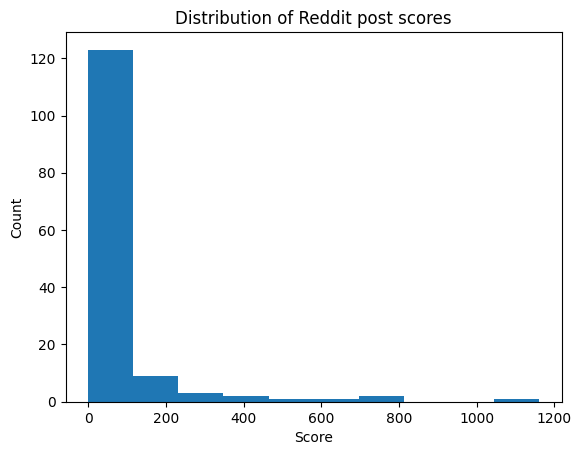

In [ ]:
import matplotlib.pyplot as plt

plt.hist(preprocessed_reddit_data['score'])
plt.title('Distribution of Reddit post scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


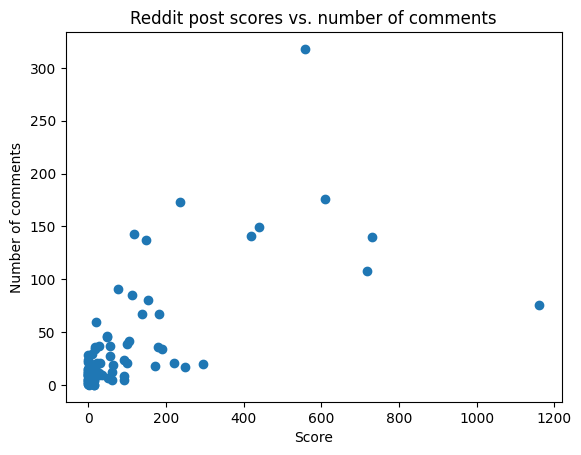

In [ ]:
plt.scatter(preprocessed_reddit_data['score'], preprocessed_reddit_data['num_comments'])
plt.title('Reddit post scores vs. number of comments')
plt.xlabel('Score')
plt.ylabel('Number of comments')
plt.show()


In [ ]:
import pandas as pd
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Loading the data from CSV files
preprocessed_twitter_data = pd.read_csv("preprocessed_twitter_data.csv")
preprocessed_reddit_data = pd.read_csv("preprocessed_reddit_data.csv")

# Joining the title and body columns from the reddit DataFrame with the tweet_text column from the twitter DataFrame
combined_text = pd.concat([preprocessed_reddit_data["title"] + " " + preprocessed_reddit_data["body"], preprocessed_twitter_data["tweet_text"]])

# Defining a regular expression pattern to match unwanted characters
unwanted_pattern = r"[!@&\\.;:,/\|()_{}\"\'\[\]]"


In [ ]:
word_counter = Counter()
for text in combined_text:
  # Using regular expressions to remove unwanted characters
  text_words = re.sub(unwanted_pattern, "", text)
  # Splitting the text into individual words
  text_words = text_words.split()
  # Excluding words that are too short
  text_words = [w for w in text_words if len(w) > 3]
  # Excluding unwanted words
  text_words = [w for w in text_words if w not in ["amp"]]
  word_counter.update(text_words)

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(250)))
image = cloud.to_image()
image.save("wordcloud.png")

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from pprint import pprint

# Loading the data from CSV files
preprocessed_reddit_data = pd.read_csv('preprocessed_reddit_data.csv')
preprocessed_twitter_data = pd.read_csv('preprocessed_twitter_data.csv')

# Joining the title and body columns from the reddit DataFrame with the tweet_text column from the twitter DataFrame
combined_text = pd.concat([preprocessed_reddit_data['title'] + ' ' + preprocessed_reddit_data['body'], preprocessed_twitter_data['tweet_text']])


In [ ]:
# Creating a list of documents, where each document is a list of words
documents = [text.split() for text in combined_text]

# Creatinga dictionary from the documents
vocab = corpora.Dictionary(documents)

# Creating a corpus from the documents
corpus = [vocab.doc2bow(text) for text in documents]

# Training an LDA model on the corpus
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)

# Printing the topics
pprint(lda_model.print_topics())

[(0,
  '0.029*"[\'@\'," + 0.023*"\'latte\'," + 0.010*"\'@\'," + '
  '0.009*"\'cappuccino\'," + 0.007*"\'coffee\'," + 0.006*"\'drink\'," + '
  '0.006*"\'would\'," + 0.005*"\'!\'," + 0.005*"\'get\'," + 0.005*"\';\',"'),
 (1,
  '0.012*"[\'@\'," + 0.010*"\'latte\'," + 0.009*"\'-\'," + 0.007*"\':\'," + '
  '0.007*"\'coffee\'," + 0.006*"\'starbucks\'," + 0.006*"\'cappuccino\'," + '
  '0.005*"\'make\'," + 0.005*"\'drink\'," + 0.004*"\';\',"'),
 (2,
  '0.026*"\'latte\'," + 0.015*"[\'@\'," + 0.013*"\'!\'," + 0.011*"\'coffee\'," '
  '+ 0.010*"\'starbucks\'," + 0.007*"\'@\'," + 0.006*"\'one\'," + '
  '0.006*"\'drink\'," + 0.006*"\'make\'," + 0.005*"\'decaf\',"'),
 (3,
  '0.013*"\'latte\'," + 0.011*"\'starbucks\'," + 0.010*"\'cappuccino\'," + '
  '0.009*"\'coffee\'," + 0.006*"\'day\'," + 0.005*"[\'@\'," + 0.005*"\'one\'," '
  '+ 0.004*"\'like\'," + 0.004*"\'&\'," + 0.004*"\'!\',"'),
 (4,
  '0.022*"\'@\'," + 0.020*"\'latte\'," + 0.012*"\'coffee\'," + 0.011*"\':\'," '
  '+ 0.010*"[\'@\'," + 0.010*"\

### Sentiment Analysis

In [ ]:
import pandas as pd
from textblob import TextBlob

# Loading the data
df = pd.read_csv('combined_text.csv')

# Adding sentiment scores to the dataframe
df['sentiment'] = df['combined_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Classifying sentiment as positive, negative or neutral
df['sentiment_class'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')


# Converting the created_utc column to datetime and extract the date
preprocessed_reddit_data['date'] = pd.to_datetime(preprocessed_reddit_data['created_utc']).dt.date
preprocessed_twitter_data['date'] = pd.to_datetime(preprocessed_twitter_data['created_at']).dt.date

# Merging the two datasets on the date column
merged_data = pd.merge(preprocessed_reddit_data, preprocessed_twitter_data, on='date', suffixes=('_reddit', '_twitter'))

# Combining the text columns from both datasets
merged_data['combined_text'] = merged_data['title'] + ' ' + merged_data['body'] + ' '+ merged_data['tweet_text']

# Adding sentiment scores to the dataframe
merged_data['sentiment'] = merged_data['combined_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Printing the first 5 rows of the dataframe with sentiment scores
merged_data.head()


,title,body,created_utc,num_comments,score,language_reddit,date,tweet_id,created_at,location,tweet_text,tweet_length,language_twitter,combined_text,sentiment
0,"['iced', 'coffee', 'recommendation']","['hello', 'guy', 'canada', 'pretty', 'avid', '...",2023-04-11 15:49:11,3,3,en,2023-04-11,1645914203415248897,2023-04-11 22:18:20+00:00,"South coast, England","['@', 'nestyzk', 'like', 'strong', 'dark', 'su...",156,en,"['iced', 'coffee', 'recommendation'] ['hello',...",0.142697
1,"['iced', 'coffee', 'recommendation']","['hello', 'guy', 'canada', 'pretty', 'avid', '...",2023-04-11 15:49:11,3,3,en,2023-04-11,1645910925268987904,2023-04-11 22:05:18+00:00,London,"['@', 'johnjbaucher', 'cheer', 'reminder', '!'...",53,en,"['iced', 'coffee', 'recommendation'] ['hello',...",0.133839
2,"['iced', 'coffee', 'recommendation']","['hello', 'guy', 'canada', 'pretty', 'avid', '...",2023-04-11 15:49:11,3,3,en,2023-04-11,1645910087347720193,2023-04-11 22:01:59+00:00,London,"['week', 'insider', ':', 'wank', 'tour', 'de',...",139,en,"['iced', 'coffee', 'recommendation'] ['hello',...",0.131339
3,"['iced', 'coffee', 'recommendation']","['hello', 'guy', 'canada', 'pretty', 'avid', '...",2023-04-11 15:49:11,3,3,en,2023-04-11,1645907084050038786,2023-04-11 21:50:02+00:00,Cornwall,"['@', 'alihugh', 'cappuccinoa', 'flat', 'white...",142,en,"['iced', 'coffee', 'recommendation'] ['hello',...",0.099534
4,"['iced', 'coffee', 'recommendation']","['hello', 'guy', 'canada', 'pretty', 'avid', '...",2023-04-11 15:49:11,3,3,en,2023-04-11,1645898560515309569,2023-04-11 21:16:10+00:00,London,"['hear', 'dalai', 'lama', 'getting', 'booking'...",66,en,"['iced', 'coffee', 'recommendation'] ['hello',...",0.131339


In [ ]:
# Classifying sentiment as positive, negative or neutral
merged_data['sentiment_class'] = merged_data['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Calculating percentage of positive, negative, and neutral sentiments
num_positive = len(merged_data[merged_data['sentiment_class'] == 'positive'])
num_negative = len(merged_data[merged_data['sentiment_class'] == 'negative'])
num_neutral = len(merged_data[merged_data['sentiment_class'] == 'neutral'])

total = num_positive + num_negative + num_neutral

percent_positive = (num_positive / total) * 100
percent_negative = (num_negative / total) * 100
percent_neutral = (num_neutral / total) * 100

print(f"Percentage of positive sentiments: {percent_positive:.2f}%")
print(f"Percentage of negative sentiments: {percent_negative:.2f}%")
print(f"Percentage of neutral sentiments: {percent_neutral:.2f}%")


Percentage of positive sentiments: 81.28%
Percentage of negative sentiments: 16.33%
Percentage of neutral sentiments: 2.39%


In [ ]:
# Saving the merged dataset to a new file
merged_data.to_csv('sentiment_analysis.csv', index=False)

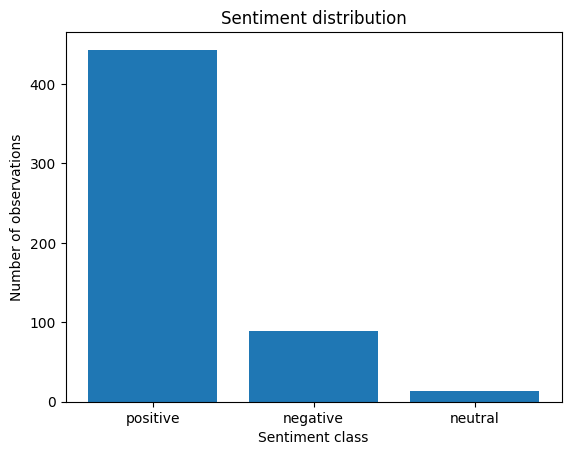

In [ ]:
import matplotlib.pyplot as plt

# Counting the number of observations in each sentiment class
sentiment_counts = merged_data['sentiment_class'].value_counts()

# Plotting a bar chart of the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment distribution')
plt.xlabel('Sentiment class')
plt.ylabel('Number of observations')
plt.show()


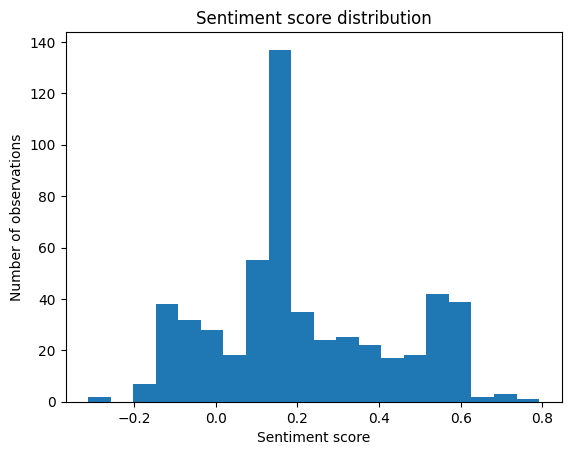

In [ ]:
# Plotting a histogram of the sentiment scores
plt.hist(merged_data['sentiment'], bins=20)
plt.title('Sentiment score distribution')
plt.xlabel('Sentiment score')
plt.ylabel('Number of observations')
plt.show()


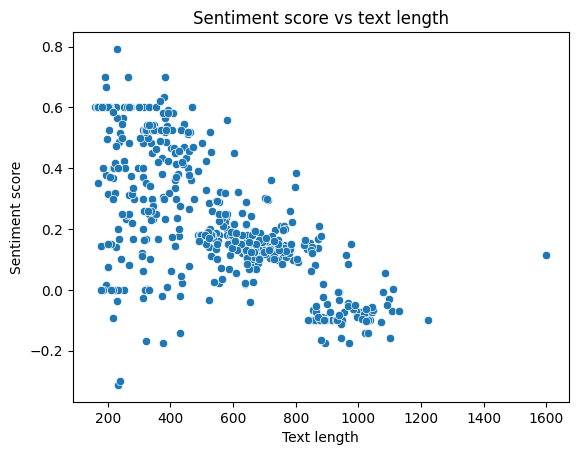

In [ ]:
# Creating a new column with the length of the combined text
merged_data['text_length'] = merged_data['combined_text'].apply(len)

# Plotting a scatter plot of sentiment score vs text length
sns.scatterplot(x='text_length', y='sentiment', data=merged_data)
plt.title('Sentiment score vs text length')
plt.xlabel('Text length')
plt.ylabel('Sentiment score')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Dark2_8

# Combining all the text with positive sentiment into a single string
positive_text = ' '.join(merged_data.loc[merged_data['sentiment_class'] == 'positive', 'combined_text'])
positive_text = positive_text.replace("'", "") # remove apostrophes

# Generating the positive sentiment wordcloud
positive_wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap=Dark2_8.mpl_colormap).generate(positive_text)

# Combining all the text with negative sentiment into a single string
negative_text = ' '.join(merged_data.loc[merged_data['sentiment_class'] == 'negative', 'combined_text'])
negative_text = negative_text.replace("'", "") # remove apostrophes

# Generating the negative sentiment wordcloud
negative_wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap=Dark2_8.mpl_colormap).generate(negative_text)


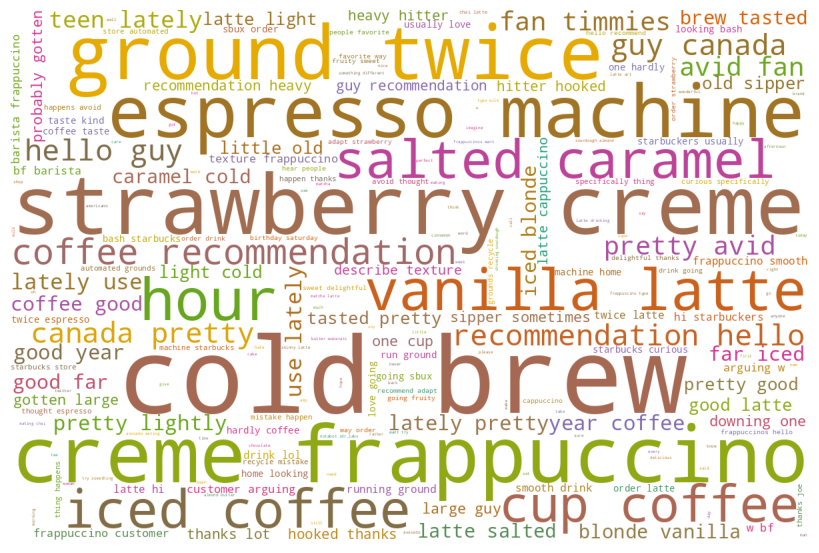

In [ ]:
# Displaying the positive sentiment wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


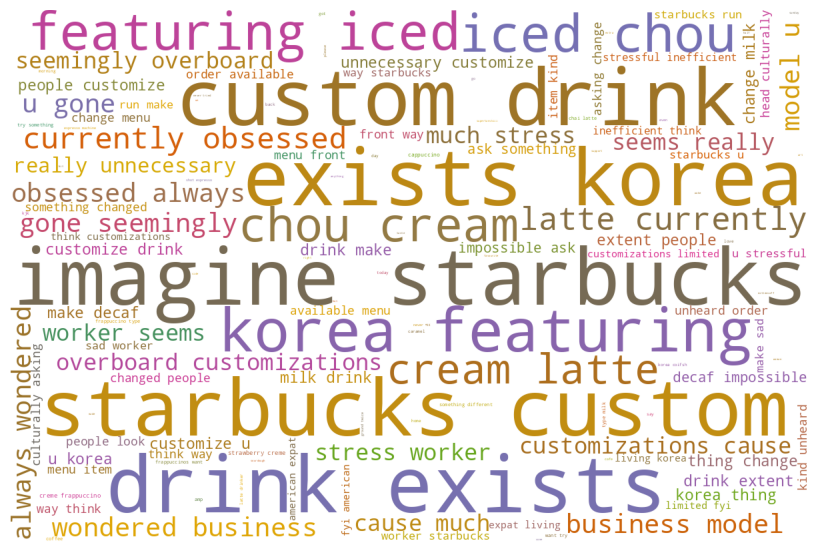

In [ ]:
# Displaying the negative sentiment wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()